### Selenium Webdriver

Mit Selenium ist es möglich, Interaktionen mit einer Webanwendung aufnehmen zu lassen und diese Tests automatisiert beliebig oft zu wiederholen.

Für einen schnellen Einstieg kann direkt die Selenium-IDE als [Firefox-Addon](https://addons.mozilla.org/en-US/firefox/addon/selenium-ide/) installiert und getestet werden: der Benutzer interagiert nur mit Firefox, Selenium nimmt den Test auf und spielt ihn wieder ab. 

Hier ist die [Anleitung für das Firefox Addon](099_FirefoxSelenium.ipynb)

Selenium kann man auch einfach aus Python heraus steuern.

In [2]:
from selenium import webdriver


Danach kann man ein Browser Objekt kreieren:

In [7]:
driver = webdriver.Firefox()


In der Variable wird der gesamte Browser nun gespeichert. Mit der Punkt Syntax kann man verschiedene Funktionen aufrufe, wie z. B. um eine URL zu öffnen, verwendet man die Funktion get():

In [ ]:
driver.get("https://www.google.ch/maps?source=tldso")


Der Browser sollte den Link oben anzeigen. Nun können wir den Browser auch sofort wieder schliessen mit der Funktion close():

In [4]:
driver.close()

#### Interaktion

Mit Selenium kann man auf Eingabefelder klicken, Tasten drücken, auf Links klicken, das Fenster scrollen und vieles mehr. Am einfachsten nimmt man das Firefox Addon und sieht sich mal an was der Browser aufzeichnet. 

ändern wir zunächst die Url. Man kann einfach driver.get() nochmals mit einer anderen URL aufrufen:

In [9]:
driver.get("https://www.google.ch")

Wenn man sich den Sourcecode der Seite ansieht, dann wird man feststellen, dass das Element die id "lst-ib" hat. Man kann jedes Element über seine ID mit Python ansteuern. Dazu gibt es die Funktion find_by_id(). In den Klammern muss der ID Name des Elements stehen. In unserem Fall hat das Eingabefeld von Google die id "lst-ib". Zunächst rufen wir die Funktion clear() auf, um sicherzustellen dass das Eingabefeld leer ist und dass es aktiviert ist (im Prinzip simulieren wir den Mausklick auf das leere Feld)

In [11]:
driver.find_element_by_id("lst-ib").clear()

**Bekommt ihr eine lange Fehlermeldung wie z.B.** 

~~~ 
error: [Errno 61] Connection refused 
~~~ 

dann scheint das Browser-Fenster nicht mehr offen zu sein. Stellt sicher dass die Zeile "driver = webdriver.Firefox()" ausgeführt worden ist. Probiert dann nochmal den Code oben.


**Oder bekommt ihr den Fehler**
~~~
NoSuchElementException: Message: Unable to locate element:
~~~
dann ist das Element nich auffindbar. Stellt sicher, dass der Browser offen ist und dass die google Suchseite geladen ist.

**Keine Fehlermeldung?**

Dann können wir die ersten Tastenzeichen an den Browser schicken:

In [12]:
driver.find_element_by_id("lst-ib").send_keys("hallo")

Versucht nun andere Suchwörter mit den Zeilen unten. 

In [15]:
driver.find_element_by_id("lst-ib").send_keys("my teacher looks like")

In [14]:
driver.find_element_by_id("lst-ib").send_keys("technoviking")

In [ ]:
driver.find_element_by_id("lst-ib").send_keys("technoviking")

Beobachtet gut was im Eingabefeld passiert. Welche Funktion haben wir vergessen zwischenzeitlich auszuführen? 

Aus dem Browser heraus kann man auch einen Screenshot machen

In [18]:
driver.save_screenshot('screenie.png')

True

Wir haben aber noch immer nicht auf den Button geklicked! Dazu müssen wir zunächst die Button ID herausfinden. Entweder über den Web-Inspektor oder über das Selenium IDE Plugin:

In [19]:
driver.find_element_by_name("btnG").click()

### Scrollen

Man kann die Scrollbar auch per Python steuern. Allerdings ein wenig komplizierter, da wir direkt eine Javascript Funktion innerhalb von Python aufrufen müssen. Dazu gibt es die Funktion "execute_script()". Innerhalb der Klammern steht Javascript code "window.scrollTo(0,1000);". In der Funktion scrollTo stehen zwei Werte, nämlich die x und y Position. Da wir hinunter scrollen wollen, ändern wir nur den zweiten Wert:

In [21]:
driver.get_window_size()


{u'height': 785, u'width': 1280}

In [24]:
driver.execute_script("window.scrollTo(0,1000);")

Das scrollt noch sehr ruckhaft. Wenn man einen "soft" Scroll haben möchte, dann muss man eine Schleife verwenden und den Browser Stück für Stück scrollen lassen. Die Variable "scrollEndPos" gibt die Endposition an und die Variable "steps" steuert die Schrittgeschwindigkeit

In [26]:
scrollEndPos = 5000
steps = 10

for y in range(scrollEndPos):
	if y % steps == 0:
		print "scroll to: " + str(y)
		position = "window.scrollTo(0, " + str(y) + ");"
		driver.execute_script(position)

scroll to: 0
scroll to: 10
scroll to: 20
scroll to: 30
scroll to: 40
scroll to: 50
scroll to: 60
scroll to: 70
scroll to: 80
scroll to: 90
scroll to: 100
scroll to: 110
scroll to: 120
scroll to: 130
scroll to: 140
scroll to: 150
scroll to: 160
scroll to: 170
scroll to: 180
scroll to: 190
scroll to: 200
scroll to: 210
scroll to: 220
scroll to: 230
scroll to: 240
scroll to: 250
scroll to: 260
scroll to: 270
scroll to: 280
scroll to: 290
scroll to: 300
scroll to: 310
scroll to: 320
scroll to: 330
scroll to: 340
scroll to: 350
scroll to: 360
scroll to: 370
scroll to: 380
scroll to: 390
scroll to: 400
scroll to: 410
scroll to: 420
scroll to: 430
scroll to: 440
scroll to: 450
scroll to: 460
scroll to: 470
scroll to: 480
scroll to: 490
scroll to: 500
scroll to: 510
scroll to: 520
scroll to: 530
scroll to: 540
scroll to: 550
scroll to: 560
scroll to: 570
scroll to: 580
scroll to: 590
scroll to: 600
scroll to: 610
scroll to: 620
scroll to: 630
scroll to: 640
scroll to: 650
scroll to: 660
scroll

### Fullscreen

Möchte man das Browser Fenster auf Fullscreen ausweiten, dann muss man zunächst einen Tastendruck F11 simulieren. Dazu benötigt man noch eine externe Bibliothek "Keys" und "ActionChains"

In [28]:
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

Mit ActionChains kann man diverse Aktionen "performen". Deshalb heisst die Funktion auch perform. Ihr seht auch, dass innerhalb der "send_keys" Funktion das Objekt Keys aufgerufen wird, welches anscheinend eine Eigenschaft "F11" hat (F11 ist die Taste die wir benötigen. Man kann aber auch ganz andere Tasten drücken lassen. Einen überblick gibt es [hier](http://seleniumhome.blogspot.ch/2013/07/how-to-press-keyboard-in-selenium.html) z.B. Keys.TAB für den Tabulator, oder Keys.ArrowUp für den Tastenpfeil nach oben.


In [29]:
ActionChains(driver).send_keys(Keys.F11).perform()


error: [Errno 61] Connection refused

### Bestehendes Firefox Profil verwenden

Jedes Mal wenn selenium driver den Firefox öffnet, wird ein komplett neues Profil angelegt, d. h. es verwendet nicht eurer bestehendes Profil. Das kann problematisch sein, wenn man z. B. Facebook verwenden möchte und nicht über den Login Prozess hinaus kommt. Viel einfacher wäre es, wenn wir die Cookies vom bestehenden Profil verwenden könnten. Dazu kann man dem python Skript mitteilen, dass es ein bestehendes Profil verwenden soll. Zunächst müssen wir dieses Profil aber finden. 

**osX**

Das Profil befindet sich unter dem Pfad

~~~
~/Library/Application\ Support/Firefox/Profiles
~~~

Probiert im Terminal mal folgendes Kommando
~~~
ls ~/Library/Application\ Support/Firefox/Profiles
~~~



Ihr solltet eine Antwort bekommen, die ungefähr so aussieht (das wir bei jedem anders aussehen):
~~~~
qhll4ntw.default
~~~~

Der vollständige Pfad lautet also:
~~~~
~/Library/Application\ Support/Firefox/Profiles/qhll4ntw.default
~~~~

**Linux**

Hier befindet sich das Profil unter:
~~~~
ls ~/.mozilla/firefox/
~~~~

Pfad würde also lauten
~~~~
~/.mozilla/firefox/qhll4ntw.default
~~~~

Das ganze Skript sieht nun so aus. Zunächst importieren wir selenium wie gewohnt. Achtung, diesmal importieren wir auch ein Modul "os". Dieses hilft uns dabei den Pfad vom Firefox Profil aufzufinden

In [32]:
from selenium import webdriver
import time, os

Danach speichern wir das Firefox Profil in einer Variablen "profile" ab und übergeben diese Variable im zweiten Schritt an das driver Objekt

In [35]:
profile = webdriver.FirefoxProfile(os.path.expanduser("~/Library/Application Support/Firefox/Profiles/qhll4ntw.default"))
driver = webdriver.Firefox(firefox_profile=profile)

In [36]:
driver.get("http://www.facebook.com")

In [ ]:
driver.quit()

### Quelltext/Sourcecode

Selenium kann den gesamten html Sourcecode von einer Seite herunterladen. Genauer gesagt, können wir den HTML Quelltext in einer Variablen speichern.

In [37]:
source = driver.page_source

Diesen Text können wir nun mit print uns ansehen:

In [38]:
print source

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" lang="en" class=" sidebarMode" id="facebook"><head><meta charset="utf-8" /><meta id="meta_referrer" content="origin-when-crossorigin" name="referrer" /><script>function envFlush(a){function b(c){for(var d in a)c[d]=a[d];}if(window.requireLazy){window.requireLazy(['Env'],b);}else{window.Env=window.Env||{};b(window.Env);}}envFlush({"ajaxpipe_token":"AXh7EUesAQ-2IXig","lhsh":"5AQGOkjha","khsh":"0`sj`e`rm`s-0fdu^gshdoer-0gc^eurf-3gc^eurf;1;enbtldou;fduDmdldourCxO`ld-2YLMIuuqSdptdru;qsnunuxqd;rdoe-0unjdojnx-0unjdojnx0-0gdubi^rdbsduOdv-0`sj`e`r-0q`xm`r-0StoRbs`qhof-0mhoj^q`xm`r","timeslice_heartbeat_config":{"pollIntervalMs":33,"idleGapThresholdMs":60,"ignoredTimesliceNames":{"requestAnimationFrame":true,"Event listenHandler mousemove":true,"Event listenHandler mouseover":true,"Event listenHandler mouseout":true,"Event listenHandler scroll":true},"enableOnRequire":false},"shouldLogCounters":false,"timeslice_categories":{"react_render

Ihr seht den gesamten Quelltext der aktuellen Seite. Das ist noch ziemlich unübersichtlich. Wie können wir nun durch aus diesem unübersehbaren Code ein einziges Element "herausfischen". 

Sehen wir uns dazu mal die Instagram Seite an. Wir öffnen sie mit der get() Funktion. Die URL zeigt uns alle Bilder die mit #sandrabland getagged worden sind. 

In [39]:
driver.get("https://www.instagram.com/explore/tags/sandrabland/")

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en" class="no-js lt-ie9 lt-ie8 lt-ie7 logged-in "> <![endif]-->
<!--[if IE 7]>         <html lang="en" class="no-js lt-ie9 lt-ie8 logged-in "> <![endif]-->
<!--[if IE 8]>         <html lang="en" class="no-js lt-ie9 logged-in "> <![endif]-->
<!--[if gt IE 8]><!-->
<html xmlns="http://www.w3.org/1999/xhtml" lang="en" class="js logged-in wf-proximanova-n3-active wf-proximanova-n4-active wf-proximanova-n6-active wf-proximanova-n7-active wf-active"><!--<![endif]--><head>
        
    <script async="" src="//connect.facebook.net/en_US/fbevents.js"></script><script id="facebook-jssdk" src="//connect.facebook.net/en_US/sdk.js"></script><script type="text/javascript">window._timings = {"domLoading": Date.now()}</script>

        <meta charset="utf-8" />
        <meta content="IE=edge" http-equiv="X-UA-Compatible" />

        <title>#sandrabland • Instagram photos and videos</title>

        <script type="text/javascript">
  WebFontConfig = {
  
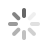
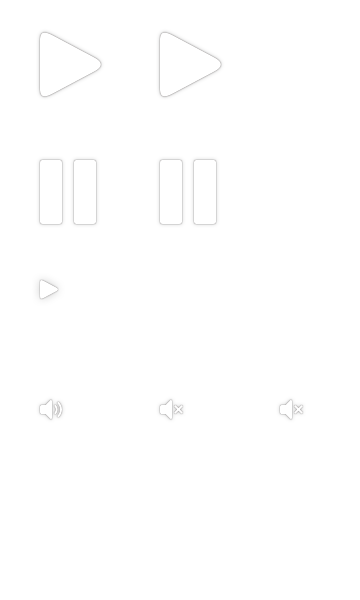
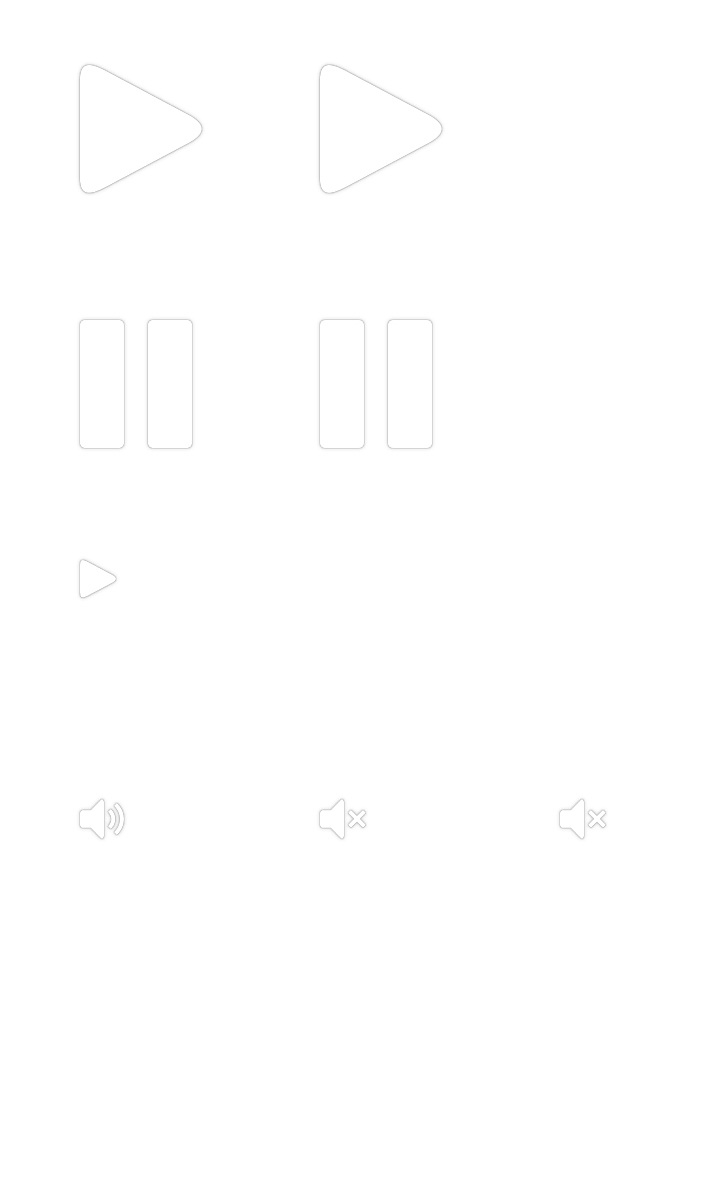

In [40]:
source = driver.page_source
print source

Um gewisse Elemente aus der Seite herauszufischen, eigent sich am besten die Bibliothek "BeautifulSoup", die wir uns in einem seperaten Notizbuch ansehen werden.